**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check input files**

In [5]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.ranknorm.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.aggregate.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpra.tsv 


In [6]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
txt_fname  = "region.annotation.genome_cres.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_cres.tsv 


## Import data

### Import STARR/MPRA/CRISPRi ranknorm scores

In [7]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.ranknorm.overlap.starrmpracrispr.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 4251    8

$fcc_astarr_macs_input_union
[1] 5990    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,TMPRA,-0.1224555,0.4341637,0.4850237
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.3415507,0.7425860,0.4850237
chr11,4551522,4551988,chr11:4551522-4551988,WSTARR,-0.1099597,0.3594306,0.4850237


**Check: region count across assays**

In [8]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR,844,1237
CRISPRi-Growth,525,575
CRISPRi-HCRFF,350,467
LMPRA,844,1237
TMPRA,844,1237
WSTARR,844,1237


### Import CREs table

In [9]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname  = "region.annotation.genome_cres.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_cres_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 27 12

$fcc_astarr_macs_input_union
[1] 27 12



Chrom,ChromStart,ChromEnd,Region,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5269503,5270633,chr11:5269503-5270633,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5275455,5276164,chr11:5275455-5276164,chr11:5275456-5276164,genome_cres,LCR HS1,enhancer,HBE1,locus control region HS1,NA,known CREs
chr11,5280584,5281266,chr11:5280584-5281266,chr11:5280585-5281266,genome_cres,LCR HS2,enhancer,HBE1,locus control region HS2,NA,known CREs


## Arrange table

In [13]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
    vec_txt_assay = rev(vec_txt_assay)
    
    ### set the order of region
    tmp = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region = tmp$Region

    ### fill na at regions unscreened by CRISPR
    tmp = tidyr::expand_grid(Assay = vec_txt_assay, Region = vec_txt_region)
    dat = dplyr::left_join(tmp, dat, by = c("Assay","Region"))
    
    ### renew factor level based on the order
    dat = dat %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels=vec_txt_assay),
            Region = factor(Region, levels=vec_txt_region),
        )
    return(dat)
})

### assign and show
lst_dat_region_score_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 5064    8

$fcc_astarr_macs_input_union
[1] 7422    8



Assay,Region,Chrom,ChromStart,ChromEnd,Score,RankNorm,Mean
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CRISPRi-Growth,chrX:48573742-48575170,chrX,48573742,48575170,0.1514840,0.7900763,0.9857651
CRISPRi-Growth,chr11:34234056-34234496,chr11,34234056,34234496,0.0034153,0.5171756,0.9807236
CRISPRi-Growth,chrX:49039753-49040214,chrX,49039753,49040214,0.0317050,0.5858779,0.9795374


In [14]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
    vec_txt_assay = rev(vec_txt_assay)
    
    ### get tables: CRE table
    lst = lst_dat_region_annot_cres_import
    tmp = lst[[txt_folder]]

    ### get tables: region scores
    lst = lst_dat_region_score_import
    dat = lst[[txt_folder]]
    
    ### join tables: region scores only at CREs
    vec = c("Chrom", "ChromStart", "ChromEnd", "Region")
    dat = dplyr::inner_join(dat, tmp, by = vec)

    ### set the order of region
    tmp = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region = tmp$Region

    ### renew factor level based on the order
    dat = dat %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels=vec_txt_assay),
            Region = factor(Region, levels=vec_txt_region),
        )
    return(dat)
})

### assign and show
lst_dat_region_score_cres = lst

res = lapply(lst, dim)
print(res)

vec = lst[[1]]
head(vec, 3)

$fcc_astarr_macs_input_overlap
[1] 126  16

$fcc_astarr_macs_input_union
[1] 132  16



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5269503,5270633,chr11:5269503-5270633,TMPRA,-0.7737500,0.2514828,0.5388493,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5269503,5270633,chr11:5269503-5270633,ASTARR,-0.1540116,0.3819692,0.5388493,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5269503,5270633,chr11:5269503-5270633,WSTARR,0.3961214,0.8303677,0.5388493,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs


## Plotting style

In [15]:
THEME_TEXT = theme(
    plot.title   = element_text(size = 17, face = "bold"),
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

## Explore: RankNorm across STARR/MPRA/CRISPRi

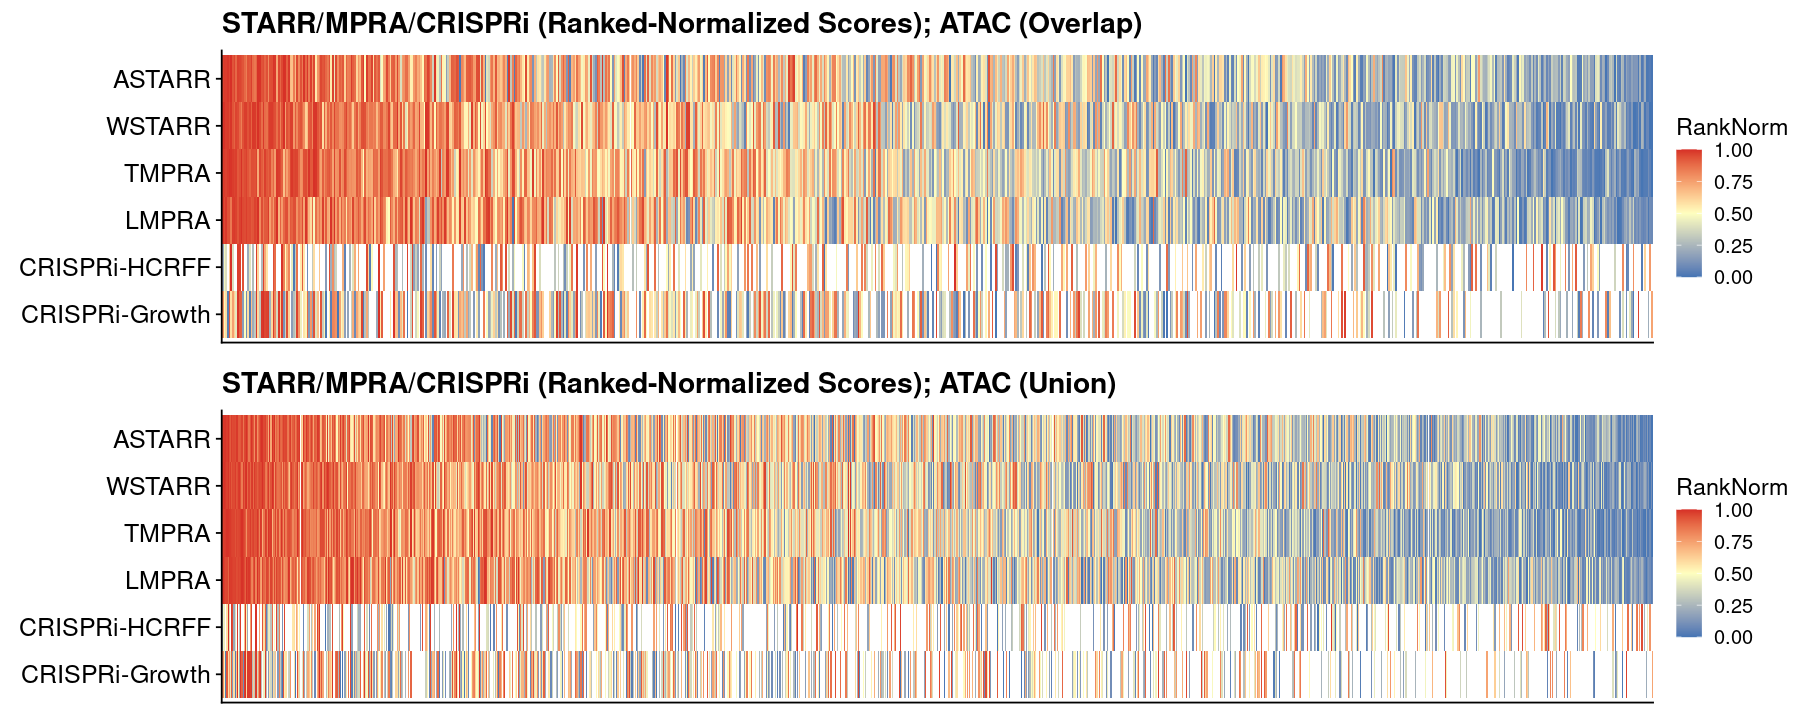

In [16]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5,
    na.value = "white"
)
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        labs(x="Open Chromatin Regions") +
        theme_cowplot() + 
        theme_text +
        theme_fill #+
        #theme_legend
    return(gpt)
})

### add title
idx = "fcc_astarr_macs_input_overlap"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA/CRISPRi (Ranked-Normalized Scores); ATAC (Overlap)")
idx = "fcc_astarr_macs_input_union"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA/CRISPRi (Ranked-Normalized Scores); ATAC (Union)")

### assign and show
lst_gpt_region_score_starrmpracrispr = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

**Choose the export plot**

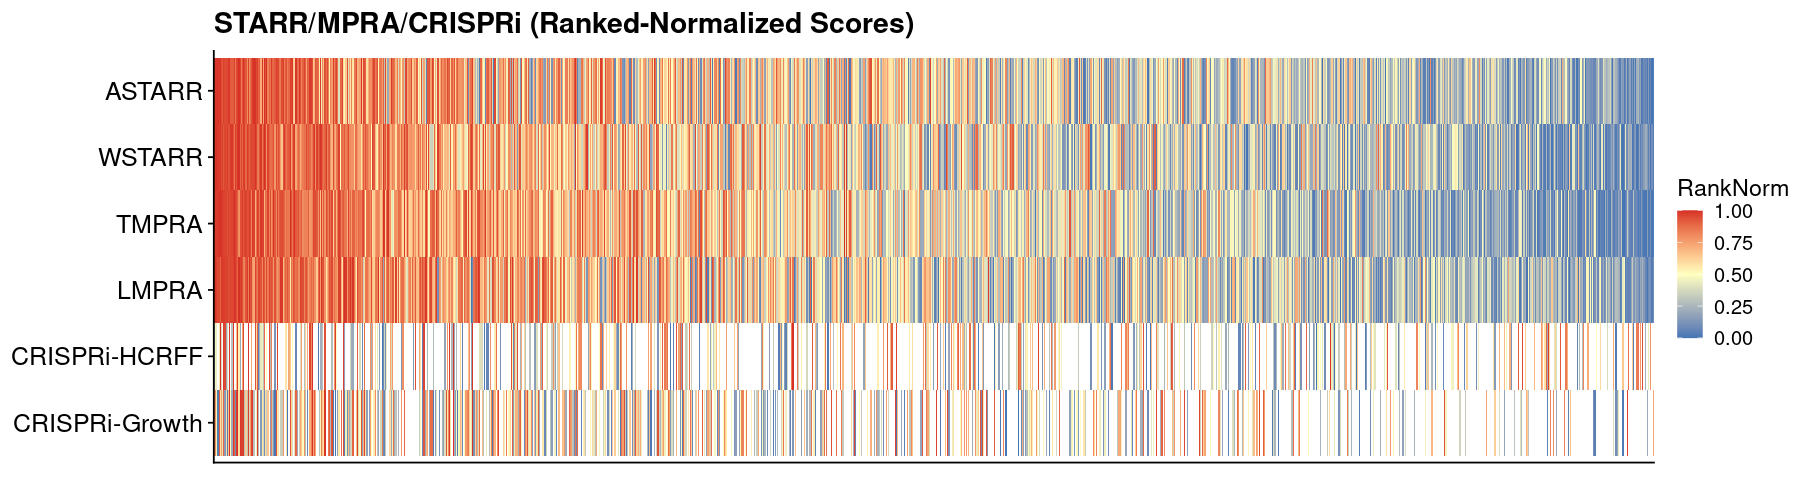

In [17]:
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_region_score_starrmpracrispr
gpt = lst[[idx]]
gpt = gpt + labs(title = "STARR/MPRA/CRISPRi (Ranked-Normalized Scores)")

### assign and show
gpt_export_ranknorm_starrmpracrispr = gpt
options(repr.plot.height=4, repr.plot.width=15)
print(gpt)

## Explore: RankNorm across STARR/MPRA/CRISPRi at labeled CREs

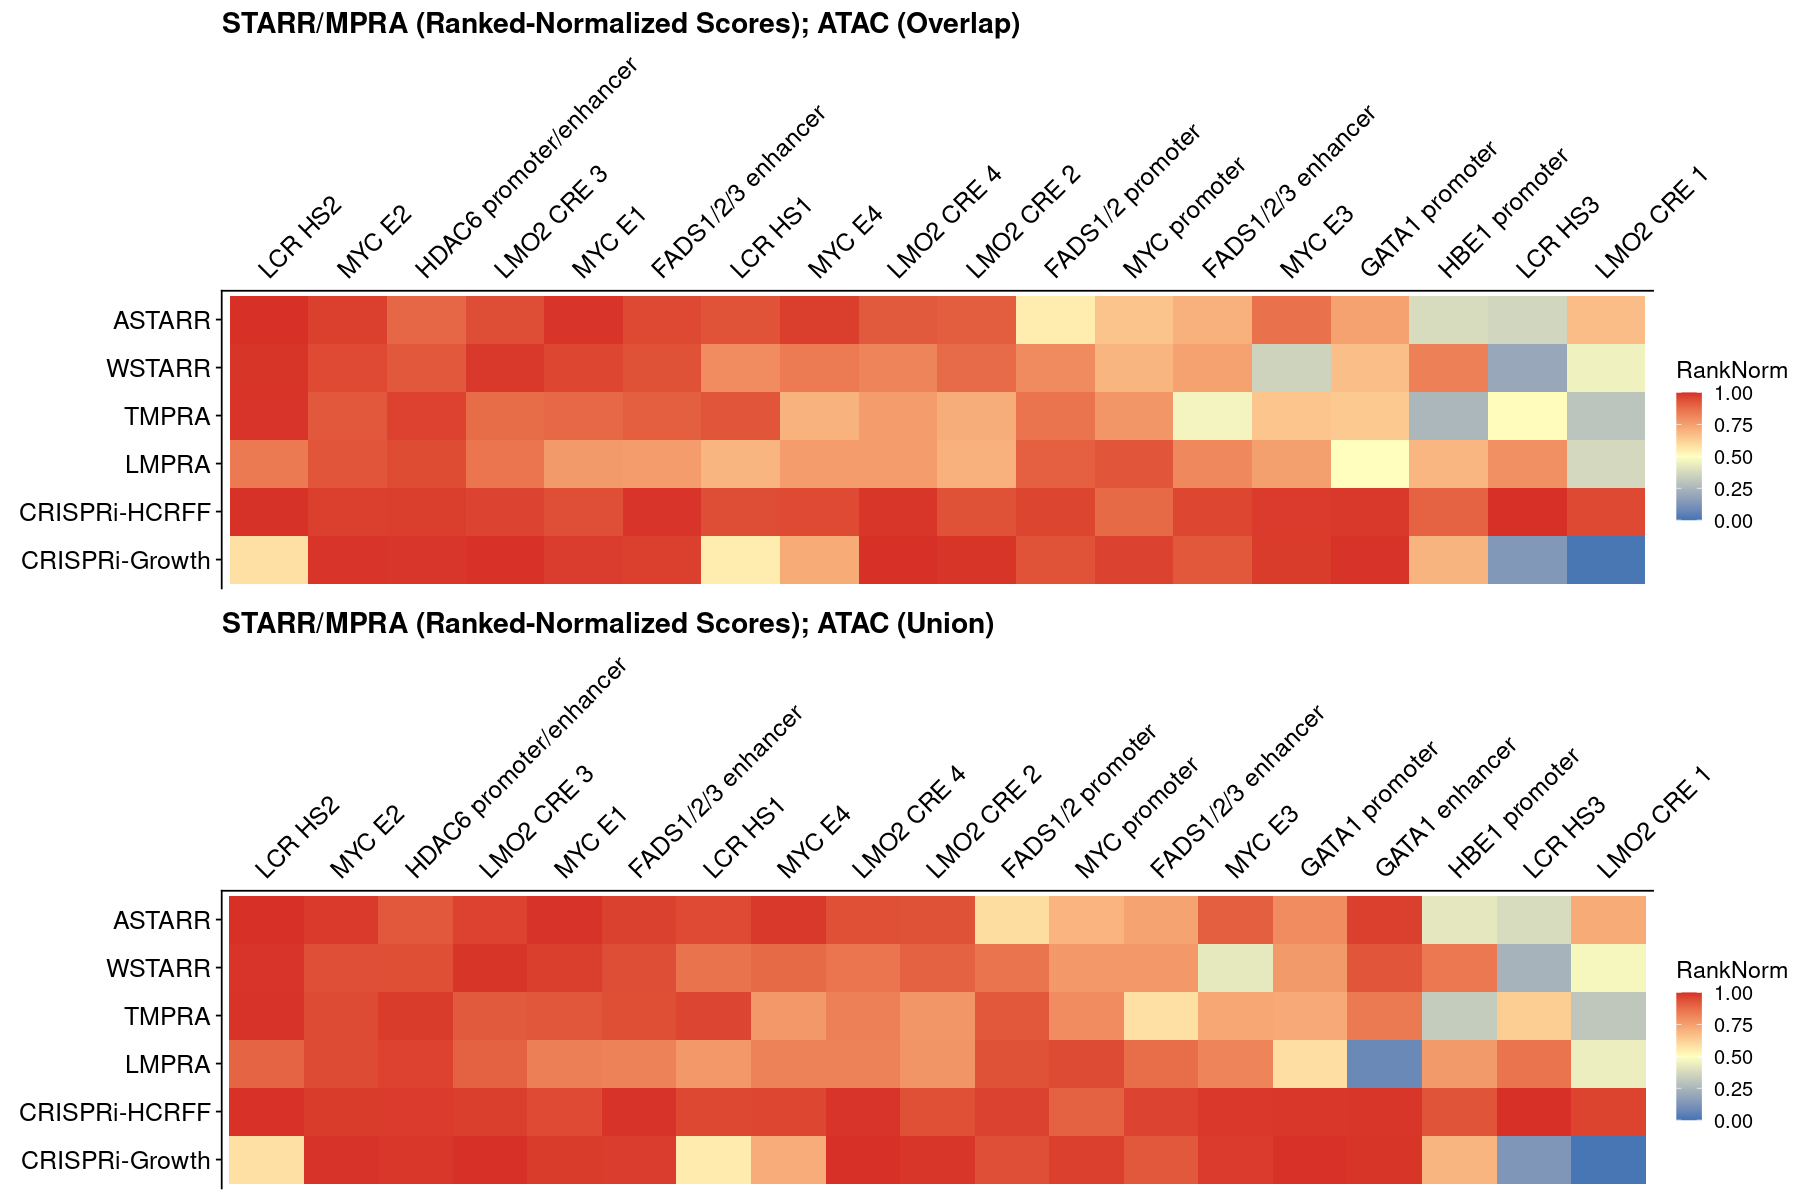

In [19]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5,
    na.value = "black",
    limits   = c(0, 1)
)
theme_text = theme(
    plot.title   = element_text(size = 17, face = "bold"),
    axis.ticks.x = element_blank(),
    axis.text.x  = element_text(size = 15, angle = 45, vjust = 0, hjust=0),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_cres
lst = lapply(lst, function(dat){
    ### filter CREs
    vec = c("LCR HS4", "LCR HS5")
    dat = dat %>% 
        dplyr::filter(Note == "known CREs") %>%
        dplyr::filter(!(Label %in% vec))

    ### set region cres label
    vec_txt_label = setNames(dat$Label, dat$Region)

    ### generate heatmap
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        scale_x_discrete(
            position = "top",
            labels   = vec_txt_label
        ) +
        labs(x="Open Chromatin Regions") +
        theme_cowplot() + 
        theme_text +
        theme_fill 
    return(gpt)
})

### add title
idx = "fcc_astarr_macs_input_overlap"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Overlap)")
idx = "fcc_astarr_macs_input_union"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Union)")

### assign and show
lst_gpt_region_score_cres = lst

options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

**Choose the export plot**

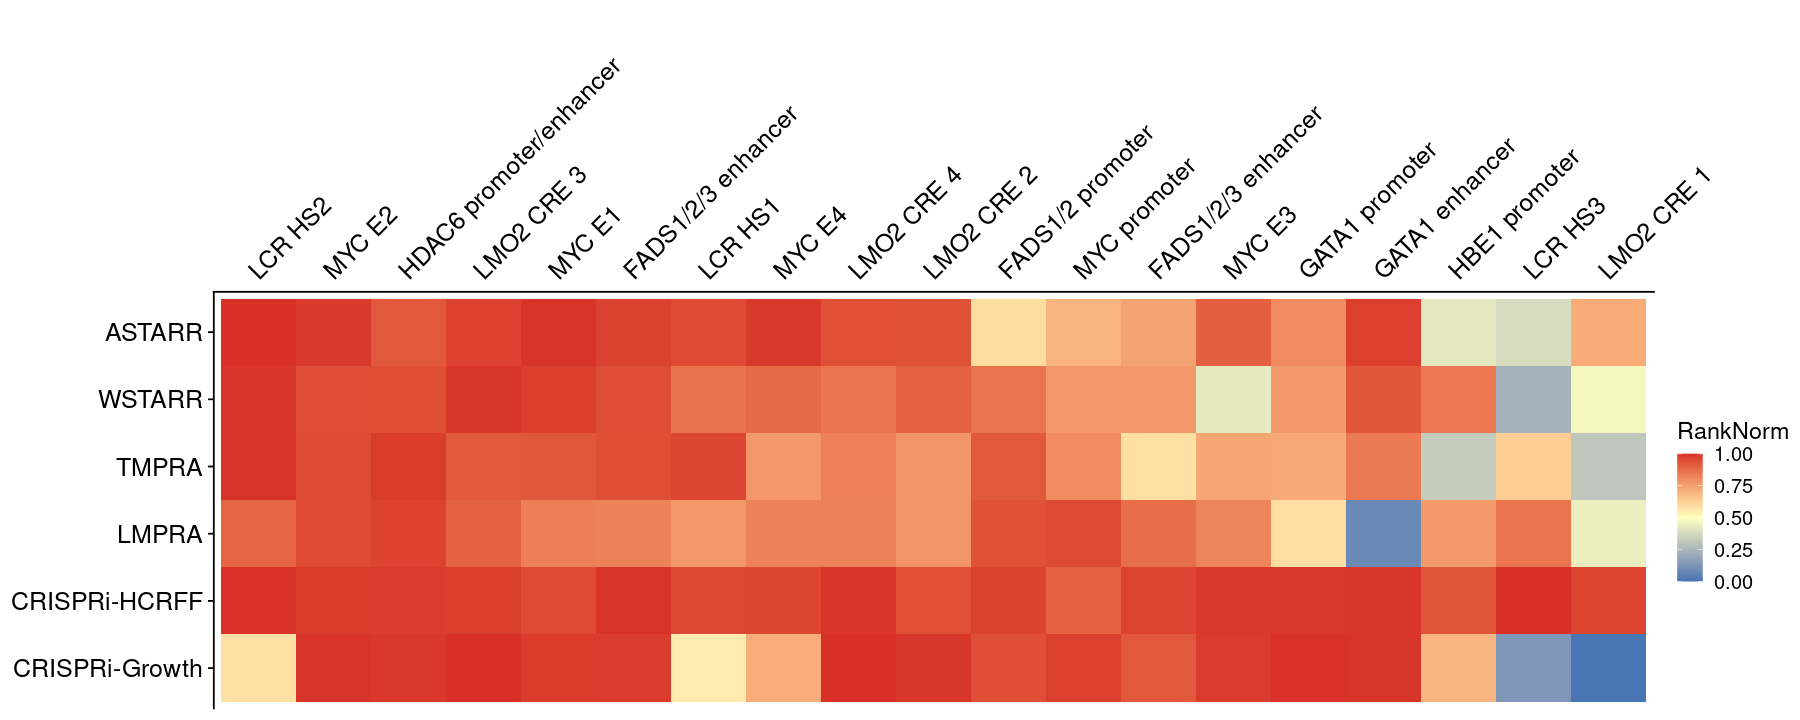

In [20]:
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_region_score_cres
gpt = lst[[idx]]
gpt = gpt + labs(title = "")

### assign and show
gpt_export_ranknorm_cres = gpt
options(repr.plot.height=6, repr.plot.width=15)
print(gpt)

## Export plots

In [21]:
plt_export = gpt_export_ranknorm_starrmpracrispr
txt_export = "fig.region_coverage_fcc.ranknorm.overlap.starrmpracrispr"
num_height = 4
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

In [22]:
plt_export = gpt_export_ranknorm_cres
txt_export = "fig.region_coverage_fcc.ranknorm.overlap.starrmpracrispr.cres"
num_height = 6
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")